## Introduction
---
- We have a dataset containing information about customers and whether they are still our customers or have churned.
- The goal is to predict a customer's churn probability (field `Churn`) based on their features.

- Our dataset contains:
    - CustomerID: Unique identifier for each customer.
    - Age: Age of the customer, reflecting their demographic profile.
    - Gender: Gender of the customer (Male or Female).
    - Tenure: Duration (in months) the customer has been with the service provider.
    - MonthlyCharges: The monthly fee charged to the customer.
    - ContractType: Type of contract the customer is on (Month-to-Month, One-Year, Two-Year).
    - InternetService: Type of internet service subscribed to (DSL, Fiber Optic, None).
    - TechSupport: Whether the customer has tech support (Yes or No).
    - TotalCharges: Total amount charged to the customer (calculated as MonthlyCharges * Tenure).
    - Churn: Target variable indicating whether the customer has churned (Yes or No).


## Initial libraries and functions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

## Exploratory data analysis (EDA)
---
- Dataset looks clean, except for the field `InternetService`, which has NaN values.

In [2]:
df = pd.read_csv('customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [4]:
df.isna().sum(), df.duplicated().sum()

(CustomerID           0
 Age                  0
 Gender               0
 Tenure               0
 MonthlyCharges       0
 ContractType         0
 InternetService    297
 TotalCharges         0
 TechSupport          0
 Churn                0
 dtype: int64,
 0)

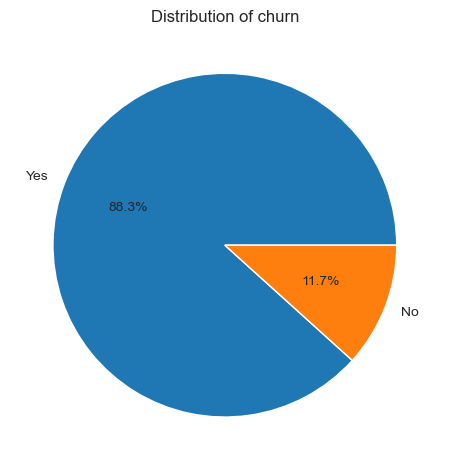

In [5]:
sns.set_style("whitegrid")
plt.pie(df['Churn'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')
plt.title('Distribution of churn')
plt.tight_layout()

## Decision tree
---

### Preprocessing

In [6]:
df = df.drop('CustomerID', axis=1)

X, y = df.drop('Churn', axis=1), df['Churn']

X = X.apply(
    lambda column: LabelEncoder().fit_transform(column) if column.dtype == 'object' else column
)

y = LabelEncoder().fit_transform(y)

X[:3], y[:3]

(   Age  Gender  Tenure  MonthlyCharges  ContractType  InternetService  \
 0   49       1       4           88.35             0                1   
 1   43       1       0           36.67             0                1   
 2   51       0       2           63.79             0                1   
 
    TotalCharges  TechSupport  
 0        353.40            1  
 1          0.00            1  
 2        127.58            0  ,
 array([1, 1, 1]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=101)

### Training our model and evaluating it

In [8]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [9]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00       188

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Plotting our tree and important features
- Because our model's accuracy was 100%, I didn't plot the confusion matrix.

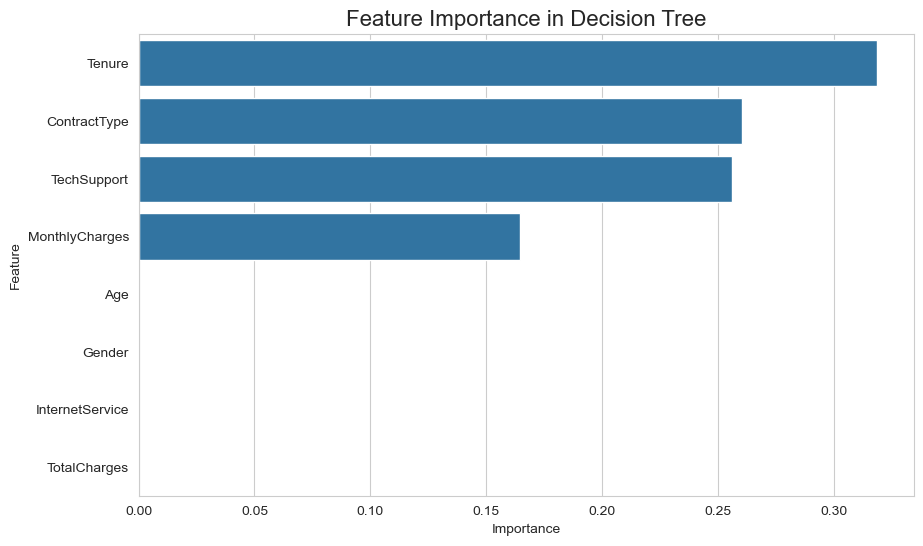

In [10]:
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance':  model.feature_importances_
})

plt.figure(figsize=(10, 6))
sns.barplot(
    data=features_df.sort_values(by='Importance', ascending=False),
    x='Importance',
    y='Feature'
)
plt.title('Feature Importance in Decision Tree', fontsize=16)
plt.show()

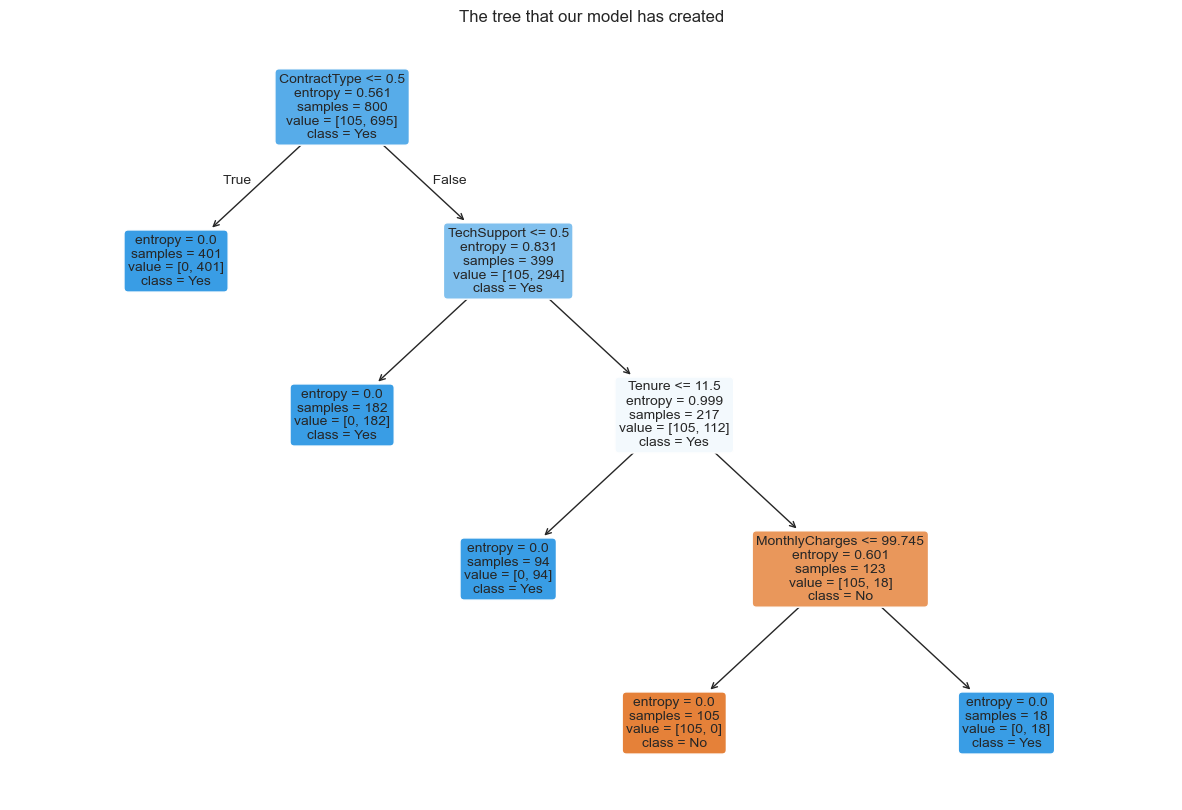

In [11]:
plt.figure(figsize=(15, 10))

plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes',], filled=True, rounded=True, fontsize=10)
plt.title('The tree that our model has created')

plt.show()

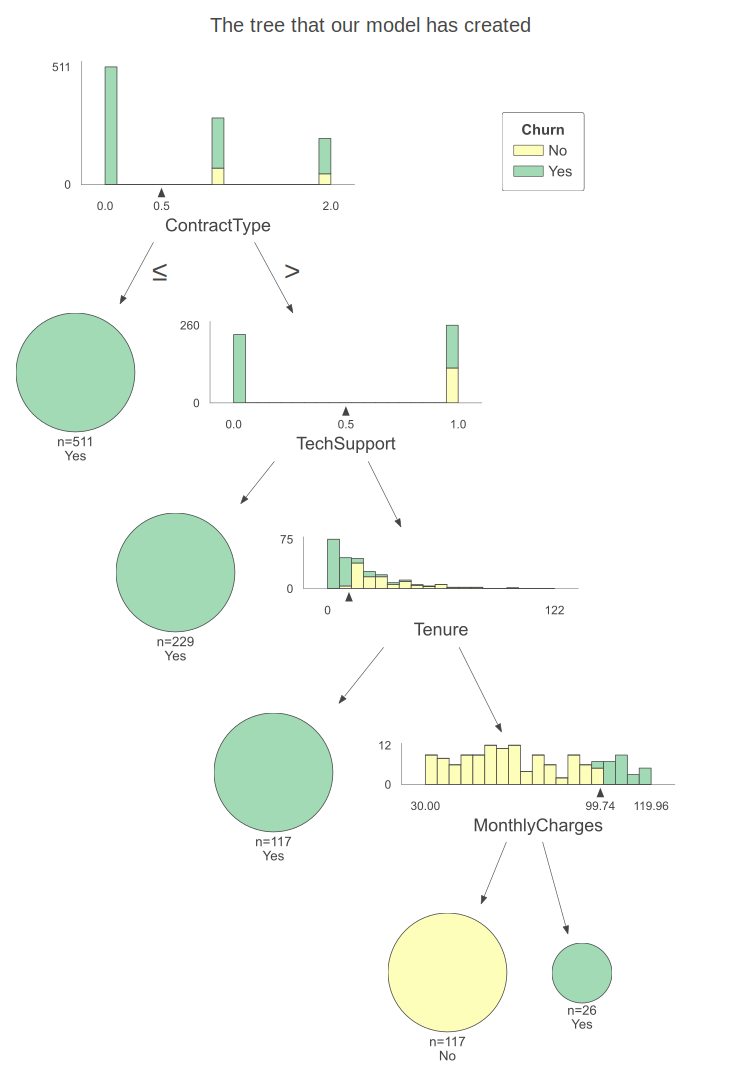

In [12]:
viz = dtreeviz.model(
    model, X, y,
    target_name='Churn',
    feature_names=X.columns, 
    class_names=["No", "Yes"]
)
viz.view(scale=2, title='The tree that our model has created')

---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>